# Simple Image Classifier

First, let's try out the Jupyter notebook.

In [1]:
print("Hello jupyter notebook!")

Hello jupyter notebook!


## Import libraries

Here, we are going to need 3 librarys:

- TensorFlow (And Keras): our neural network framework
- Numpy: imports and deals with our datasets
- Matplotlib: plot our results out for us

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Helper libs
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Import MNIST fashion dataset

We will be building a image classifier for the MNIST fashion dataset. We need to first import the dataset as our network's input.

Also, our network will classify the images into categories referenced as 0 to 9. We will name our categories here.

In [3]:
# Import MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's take a look at out training data and our test images.

In [4]:
print("Train images:", train_images.shape, len(train_labels), train_labels)
print("Test images: ", test_images.shape, len(test_images), test_labels)

Train images: (60000, 28, 28) 60000 [9 0 0 ... 3 0 5]
Test images:  (10000, 28, 28) 10000 [9 2 1 ... 8 1 5]


As we can see, there are 60000 images in the training data, with 60000 labels to them. There's 10000 test images for us to evaluate our trained model.

Let's see the first image of the dataset:

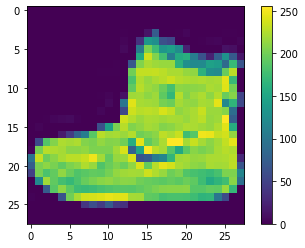

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

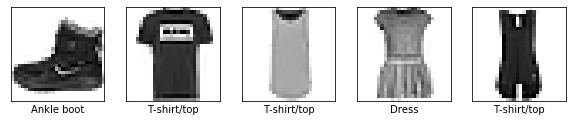

In [6]:
# Convert the pixels to a range of (0, 1)
train_images = train_images / 255
test_images = test_images / 255

# Check the conversion
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building and training the model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.5031 - accuracy: 0.8242
Epoch 2/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3769 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3384 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3124 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2961 - accuracy: 0.8901
Epoch 6/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2802 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2673 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2586 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2472 - accuracy: 0.9071
Epo

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2569 - accuracy: 0.8818

Test accuracy: 0.8818


## Predictions

In [10]:
predictions = model.predict(test_images)
print(predictions[0])

[3.0090948e-06 3.3733927e-12 5.4052601e-10 4.8654514e-10 1.8000867e-08
 1.0883472e-03 4.6738901e-08 5.4046968e-03 3.6135236e-07 9.9350363e-01]


In [11]:
print(np.argmax(predictions[0]))

9


In [14]:
print("Prediction:", class_names[np.argmax(predictions[0])])
print("Reality:   ", class_names[test_labels[0]])

Prediction: Ankle boot
Reality:    Ankle boot


In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

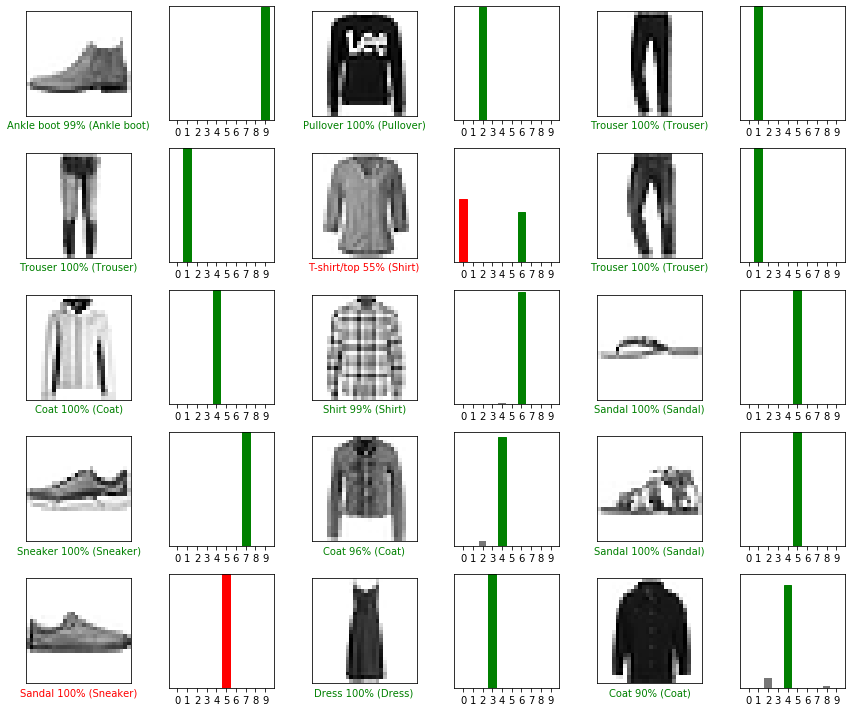

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()